 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

whale_df = pd.read_csv(whale_returns_csv , index_col = 'Date' , 
                       parse_dates = True, infer_datetime_format = True) #converts the csv into a dataframe, and sets the index to be the date
whale_df = whale_df.sort_index() #sorts the dataframe by ascending date
whale_df.head() #gives preview of the dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.isnull().sum() #Will return 0 if nulls are dropped

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv , index_col = 'Date' , 
                       parse_dates = True, infer_datetime_format = True)
algo_df = algo_df.sort_index()
algo_df.head() 

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
daily_returns =  pd.read_csv(sp500_history_csv , index_col = 'Date' , 
                       parse_dates = True, infer_datetime_format = True)
daily_returns = daily_returns.sort_index()
daily_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
daily_returns.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
daily_returns['Close'] = daily_returns['Close'].str.replace("$","") #get rid of dollar signs
daily_returns['Close'] = daily_returns['Close'].astype('float') #change type from object to float
daily_returns.dtypes #check new data types

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
daily_returns = daily_returns.pct_change() #changes to percent change
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
daily_returns = daily_returns.dropna().copy()
daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
daily_returns = daily_returns.rename(columns = {'Close': 'S&P 500'}) #rename from close to S&P 500
daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
comb_df = pd.concat([whale_df , algo_df , daily_returns] , axis = 'columns' , join = 'inner') #'Combined Dataframe'
comb_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

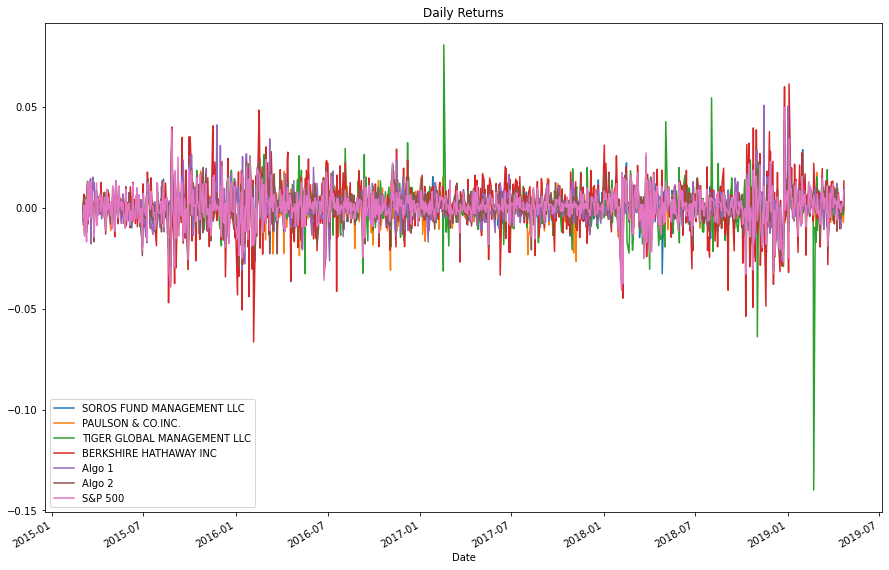

In [15]:
# Plot daily returns
comb_df.plot(figsize=(15,10),title="Daily Returns");

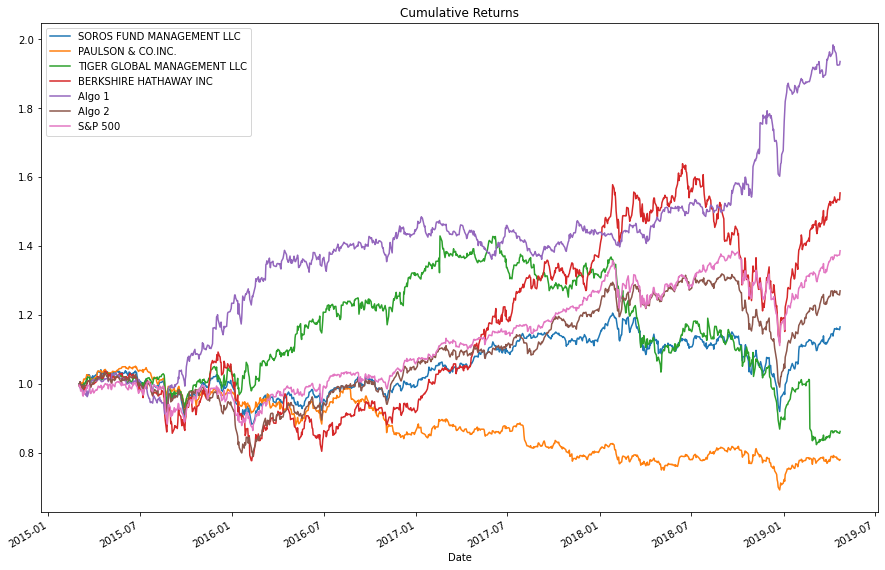

In [16]:
# Plot cumulative returns
cum_returns = (1 + comb_df).cumprod() #formula for cumulative returns
cum_returns.plot(figsize = (15,10) , title = 'Cumulative Returns')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

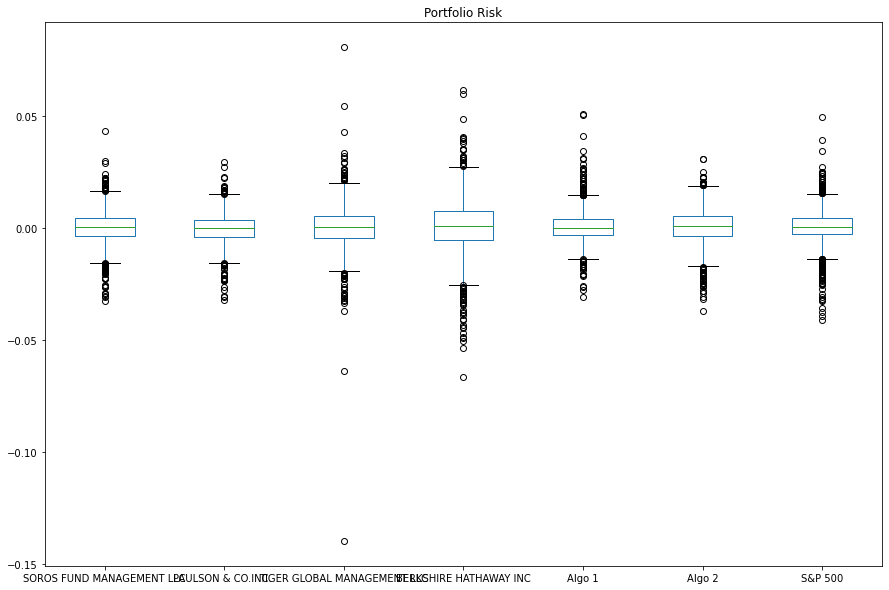

In [17]:
# Box plot to visually show risk
comb_df.plot.box(figsize = (15,10) , title = 'Portfolio Risk')

## Q: Which box has the largest spread? Which box has the smallest spread?
A: The box with the largest spread is Berkshire Hathaway inc, despite Tiger Global Management having further outliers. The box with the smallest spread is Algo 1.

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio.
standard_dev = comb_df.std().sort_values()
standard_dev

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

## Q: Which Portfolios are riskier than the S&P 500?
A: Based on the standard deviation, Berskshire Hathaway Inc, and Tiger Global Management LLC are riskier than the S&P 500.

In [19]:
# Determine which portfolios are riskier than the S&P 500
sp500_risk = standard_dev['S&P 500']

is_riskier = standard_dev > sp500_risk #if the standard deviation is greater than the sp500, then risk is greater, will result in true
is_riskier

PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Based on the above results, my analysis that Berkshire and Tiger are riskier than the S&P500 holds true.

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annual_risk = standard_dev * np.sqrt(252) #Formula for annualized standard deviation
annual_risk

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

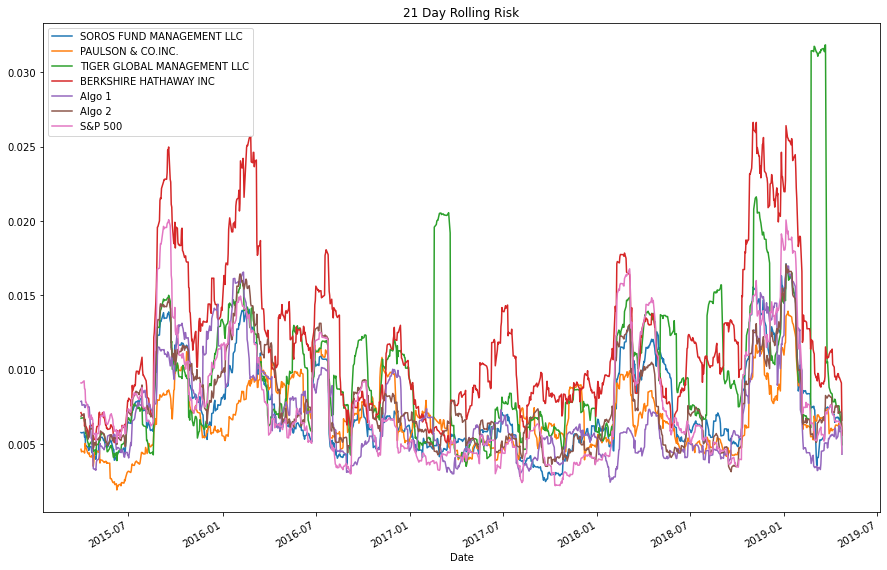

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
rolling_std21 = comb_df.rolling(window = 21).std()
rolling_std21.plot(figsize = (15,10) , title = '21 Day Rolling Risk')

## Q: Does the risk increase for each of the portfolios at the same time risk increases in the S&P
A: It would appear that for the most part, the portfolios' risks correlate to the risk of the S&P 500, some notable variance however would be Tiger Global Management between 2017-01 and 2017-07, and again after 2019-01. In these periods, Tiger Global's risk seems to spike without any relation to the S&P 500.

In [22]:
# Construct a correlation table
correlation = rolling_std21.corr()
correlation.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.664590,0.451969,0.859187,0.721356,0.872922,0.911914
PAULSON & CO.INC.,0.664590,1.000000,0.407927,0.631215,0.585584,0.688595,0.597760
TIGER GLOBAL MANAGEMENT LLC,0.451969,0.407927,1.000000,0.413311,0.265667,0.359691,0.414108
BERKSHIRE HATHAWAY INC,0.859187,0.631215,0.413311,1.000000,0.794022,0.824877,0.812766
Algo 1,0.721356,0.585584,0.265667,0.794022,1.000000,0.760948,0.699671
Algo 2,0.872922,0.688595,0.359691,0.824877,0.760948,1.000000,0.901190
S&P 500,0.911914,0.597760,0.414108,0.812766,0.699671,0.901190,1.000000


## Q: Which returns most closely mimic the S&P 500?
A: The three returns that most closely mimic the S&P 500 are Soros Fund Management LLC (approx. 0.91), Algo 2 (approx. 0.90), and Berkshire Hathaway Inc (approx. 0.81). Soros and Algo 2 mimic much more closely than Berkshire.

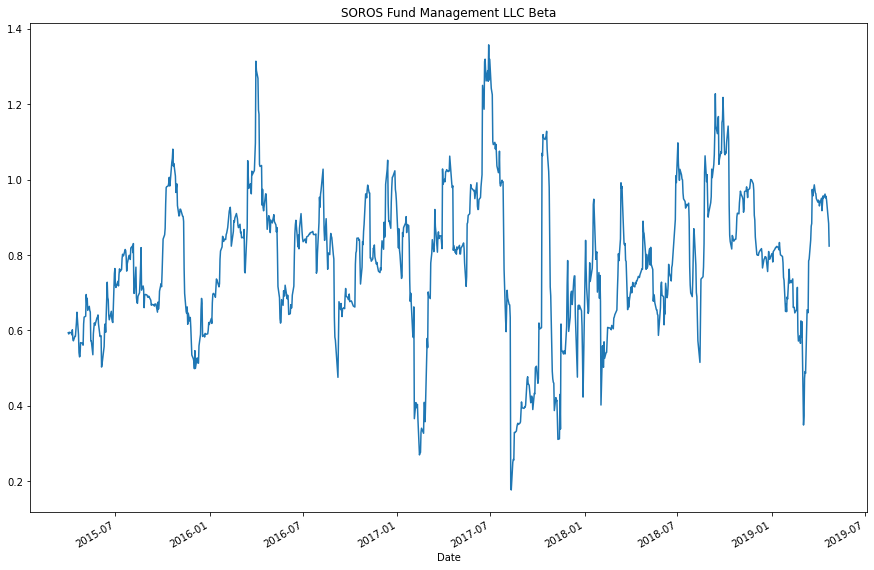

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

#Calculate Covariance of Soros , using same window has above, 21 days
covariance = comb_df['SOROS FUND MANAGEMENT LLC'].rolling(window = 21).cov(comb_df['S&P 500'])

#calculate variance of S&P 500
variance = comb_df['S&P 500'].rolling(window = 21).var()

#calculate beta
beta = covariance/variance

#plot beta
beta.plot(figsize = (15,10) , title = 'SOROS Fund Management LLC Beta')


## Q: Does the Portfolio seem sensitive to movements in the S&P 500?
A: Seeing as the beta seems to hover on average somewhere between 0.6 and 1.0, obviously with various peaks and valleys, I would sasy that SOROS is fairly sensitive to movements in the S&P 500. At times, the beta is as high as nearly 1.4, meaning that SOROS will move at 140% the same direction of the S&P, other times it's as low as nearly 0.2, meaning that SOROS will move at only 20% of the S&P.

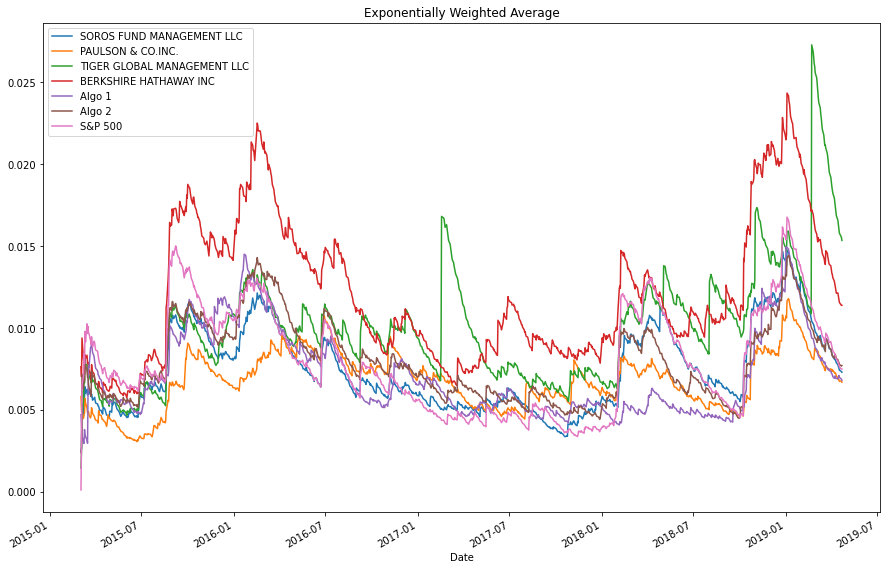

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 

#Question seems to want all of the portfolios, so will include all.
comb_df.ewm(halflife=21).std().plot(figsize=(15,10), title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
sharpe_rats = (comb_df.mean() * 252) / (comb_df.std() * np.sqrt(252)) #formula to find annualized sharpe ratios
sharpe_rats = sharpe_rats.sort_values()
sharpe_rats

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

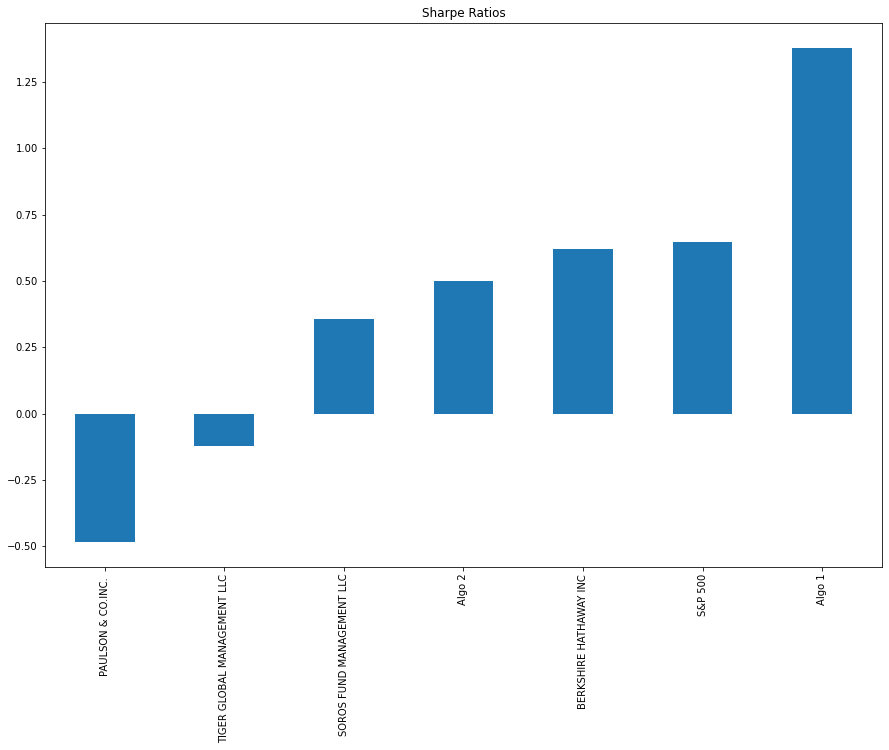

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_rats.plot(kind = 'bar', figsize = (15,10) , title = 'Sharpe Ratios' )

## Q: On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?
A: Based on this performance metric, it would appear that Algo 1 manages to outperform both the S&P 500 and all of the whales. Algo 2 however underperforms the market, and is outperformed by Berkshire. Algo 2 does manage to outperform the other whales.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
amd_csv = Path("Resources/AMD.csv") #First Stock is AMD
amd_df = pd.read_csv(amd_csv) #instantiate dataframe from csv
amd_df['Date'] = pd.to_datetime(amd_df['Date']).dt.date #remove the timestamp from the date
amd_df = amd_df.set_index('Date') #set the dataframes index as the date
amd_df = amd_df.rename(columns={"Close" : "AMD"}) #Rename close column to AMD
amd_df.head()

,AMD
Date,
2015-03-03,3.14
2015-03-04,3.05
2015-03-05,2.98
2015-03-06,2.92
2015-03-09,2.93


In [28]:
# Read the second stock
nvidia_csv = Path("Resources/NVIDIA.csv") #Second stock is NVIDIA
nvidia_df = pd.read_csv(nvidia_csv) #instantiate dataframe from csv
nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date']).dt.date #remove the timestamp from the date
nvidia_df = nvidia_df.set_index('Date') #set the dataframes index as the date
nvidia_df = nvidia_df.rename(columns={"Close" : "NVIDIA"}) #Rename close column to NVIDIA
nvidia_df.head()

,NVIDIA
Date,
2015-03-03,22.18
2015-03-04,22.43
2015-03-05,22.86
2015-03-06,22.55
2015-03-09,22.61


In [29]:
# Read the third stock
intel_csv = Path("Resources/Intel.csv") #Third stock is Intel
intel_df = pd.read_csv(intel_csv) #instantiate dataframe from csv
intel_df['Date'] = pd.to_datetime(intel_df['Date']).dt.date #remove the timestamp from the date
intel_df = intel_df.set_index('Date') #set the dataframes index as the date
intel_df = intel_df.rename(columns={"Close" : "Intel"}) #Rename close column to Intel
intel_df.head()

,Intel
Date,
2015-03-03,34.10
2015-03-04,34.12
2015-03-05,33.73
2015-03-06,33.19
2015-03-09,32.72


In [30]:
# Concatenate all stocks into a single DataFrame
my_fund = pd.concat([amd_df, nvidia_df, intel_df], axis = 'columns' , join = 'inner')
my_fund.head()

,AMD,NVIDIA,Intel
Date,,,
2015-03-03,3.14,22.18,34.10
2015-03-04,3.05,22.43,34.12
2015-03-05,2.98,22.86,33.73
2015-03-06,2.92,22.55,33.19
2015-03-09,2.93,22.61,32.72


In [31]:
#change close into percent change
my_fund = my_fund.pct_change()
my_fund.head()

,AMD,NVIDIA,Intel
Date,,,
2015-03-03,NaN,NaN,NaN
2015-03-04,-0.028662,0.011271,0.000587
2015-03-05,-0.022951,0.019171,-0.011430
2015-03-06,-0.020134,-0.013561,-0.016009
2015-03-09,0.003425,0.002661,-0.014161


In [32]:
# Drop Nulls
my_fund = my_fund.dropna().copy() # Drop nulls
my_fund.isnull().sum() #Prove they've dropped.

AMD       0
NVIDIA    0
Intel     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_returns = my_fund.dot(weights) # Uses the weights to create one column of weighted returns
weighted_returns.head() #Check that it worked

Date
2015-03-04   -0.005601
2015-03-05   -0.005070
2015-03-06   -0.016568
2015-03-09   -0.002692
2015-03-10   -0.005779
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
comb_df['Custom'] = weighted_returns
comb_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.005601
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.005070
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016568
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.002692
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.005779


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
comb_df = comb_df.dropna().copy()
comb_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [36]:
# Risk
annual_risk = comb_df.std() * np.sqrt(252) #calculates the annual risk of the dataframe including my custom portfolio
annual_risk = annual_risk.sort_values() #sorts the risks from lowest to highest
annual_risk

PAULSON & CO.INC.              0.111556
Algo 1                         0.121058
SOROS FUND MANAGEMENT LLC      0.125406
Algo 2                         0.132475
S&P 500                        0.135831
TIGER GLOBAL MANAGEMENT LLC    0.173072
BERKSHIRE HATHAWAY INC         0.205148
Custom                         0.358267
dtype: float64

## As we can see, my custom portfolio is riskier than both the algos, and the whales.

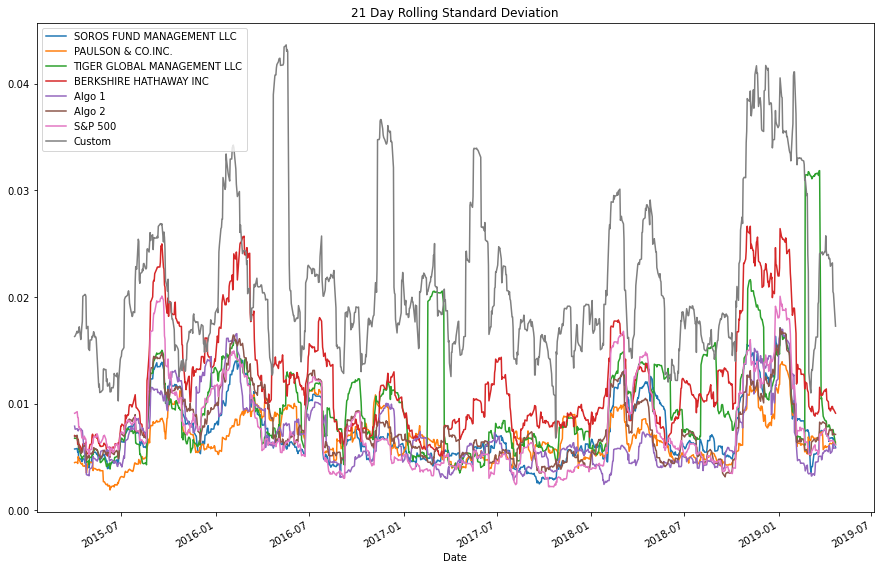

In [37]:
# Rolling
new_rolling_risk21 = comb_df.rolling(window=21).std()

new_rolling_risk21.plot(figsize = (15,10) , title = '21 Day Rolling Standard Deviation')

## Based on this graph, it would appear as though the risk of my custom portfolio is not highly influenced by the risk of the S&P500. There are several risk spikes that do not seem to be caused by the S&P 500. Additionally, the risk of my custom portfolio remains consistently higher than the other portfolios.

In [38]:
# Annualized Sharpe Ratios
new_shape_rats = (comb_df.mean() * 252) / (comb_df.std() * np.sqrt(252))
new_sharpe_rats = new_shape_rats.sort_values()
new_sharpe_rats

PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
SOROS FUND MANAGEMENT LLC      0.345506
Algo 2                         0.486307
BERKSHIRE HATHAWAY INC         0.614872
S&P 500                        0.641630
Algo 1                         1.374206
Custom                         1.418074
dtype: float64

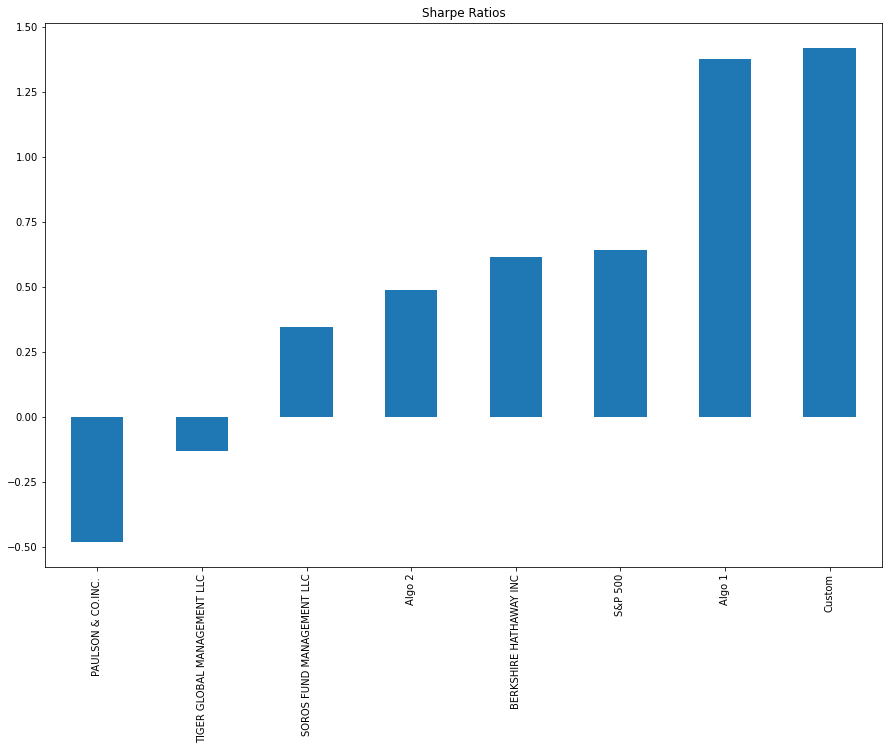

In [39]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_rats.plot(kind = 'bar', figsize = (15,10) , title = 'Sharpe Ratios')

## Seems that despite the high risk, my sharpe ratio outperforms the algos and the whales, which means that my returns were even higher than my risk. This presents the risk of using sharpe ratios to determine where to invest. If the return rates are high enough, the risk becomes much less of a factor.

In [40]:
# Create a correlation analysis
new_correlation = new_rolling_risk21.corr()
new_correlation.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.664431,0.451288,0.859062,0.721681,0.872871,0.912208,0.583128
PAULSON & CO.INC.,0.664431,1.000000,0.407396,0.630825,0.586071,0.688576,0.598278,0.522013
TIGER GLOBAL MANAGEMENT LLC,0.451288,0.407396,1.000000,0.412410,0.265734,0.359179,0.413978,0.306484
BERKSHIRE HATHAWAY INC,0.859062,0.630825,0.412410,1.000000,0.794786,0.824919,0.813361,0.617324
Algo 1,0.721681,0.586071,0.265734,0.794786,1.000000,0.761091,0.699649,0.528900
Algo 2,0.872871,0.688576,0.359179,0.824919,0.761091,1.000000,0.901337,0.501644
S&P 500,0.912208,0.598278,0.413978,0.813361,0.699649,0.901337,1.000000,0.517575
Custom,0.583128,0.522013,0.306484,0.617324,0.528900,0.501644,0.517575,1.000000


## As mentioned above regarding the plot of the rolling standard deviation, my portfolio has a fairly low correlation with the S&P 500 of approximately 0.52.

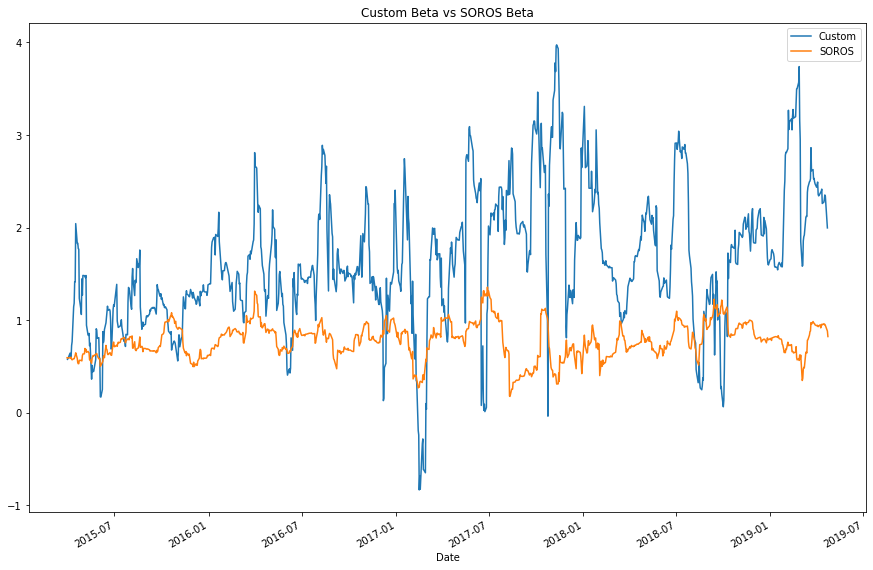

In [41]:
# Beta

#Calculate Covariance of my custom portfolio, using same window has above, 21 days
custom_covariance = comb_df['Custom'].rolling(window = 21).cov(comb_df['S&P 500'])

#calculate variance of S&P 500
variance = comb_df['S&P 500'].rolling(window = 21).var() #This was already calculated above, doing this for posterity

#calculate beta
custom_beta = custom_covariance/variance

#plot beta
ax = custom_beta.plot(figsize = (15,10) , title = 'Custom Beta vs SOROS Beta')
beta.plot(figsize= (15,10))
ax.legend(["Custom", "SOROS"])

## Compared to SOROS, generally speaking, my portfolio is more heavily influenced by the S&P 500. Whereas SOROS sometimes spikes up to a beta of 1.4, mine spikes as high as 4. This means that when the stock market performs well, my stocks will soar, however when the market recesses, I will suffer. 